In [8]:
import sys
sys.path.append('../')

from cube import Cube
from mcts import MCTS
from astar import Astar

import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
max_scramble_depth = 7
num_per_scramble_depth = 10
num_iterations_per_solve = 10_000

# MCTS or Astar
algorithm = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)
# algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve)

100%|██████████| 10/10 [02:05<00:00, 12.50s/it]


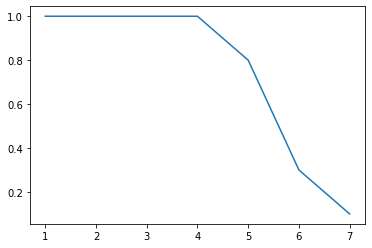

In [6]:
percentages = []

for scramble_depth in range(1, max_scramble_depth + 1):
    nr_solved = 0
    for _ in tqdm(range(num_per_scramble_depth)):
        cube = Cube()
        cube.scramble(scramble_depth)
        solution = algorithm.solve(cube, num_iterations_per_solve)
        if solution is not None:
            nr_solved += 1
    percentages.append(nr_solved / num_per_scramble_depth)

<BarContainer object of 7 artists>

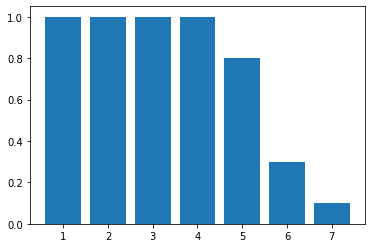

In [12]:
plt.bar(range(1, max_scramble_depth + 1), percentages)